In [ ]:
import zfit
from zfit import z
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from coffea.analysis_objects import JaggedCandidateArray
from coffea.util import load

In [ ]:
# Model definition

## CrystalBall test

crystal = True

# Mass observable
obs = zfit.Space('jpsi mass', (2.95, 3.25))

# Mean
mu = zfit.Parameter('mean2', 3.09, 2.95, 3.15)

# Error
sigma = zfit.Parameter('sigma2', 0.05, 0.0, 1.0)

# alpha
alpha_sig = zfit.Parameter('alpha', 1, 0, 10)

# n signal
n_sig = zfit.Parameter('n_sig', 90, 0.1, 120)

signal = zfit.pdf.CrystalBall(obs=obs, mu=mu, sigma=sigma, alpha=alpha_sig, n=n_sig)

signal_yield = zfit.Parameter('yield_model', 443804, 0, 1000000000, step_size=10)

signal_ext = signal.create_extended(signal_yield)

# Background definition

## exponential test

lambd = zfit.Parameter("lambda", -0.1, -5, -0.01)
exponential = zfit.pdf.Exponential(lambd, obs=obs)

background_yield = zfit.Parameter('yield_back', 58584, 0, 1000000000, step_size=1)

background_ext = exponential.create_extended(background_yield)

# model function

model = zfit.pdf.SumPDF([signal_ext, background_ext])

In [ ]:
# import histogram
#jpsi_mass = load("../output/test_plot/hist/hist_Dimu_mass.hist")

data = load("../output/test_plot/merged/test_plot_merged.coffea")

getmass = data['Dimu'].get('__fast_mass')

mass_data = getmass._value

# take the data
#massdata = jpsi_mass.to_numpy()
#mass = massdata[1]

#dictmap = dict(zip(jpsi_mass.to_numpy()[0], jpsi_mass.to_numpy()[1]))

#data = np.concatenate([np.full(int(key), value) for key, value in dictmap.items()])    

# Convert for zfit data format
datafit = zfit.Data.from_numpy(obs=obs, array=mass_data)

In [ ]:
# plot the pdf before fitting
plt.figure()
plt.title("Before fitting")

# plot the data
plt.hist(mass_data, color='black', bins=50, histtype="stepfilled", alpha=0.1)
plt.hist(mass_data, color='black', bins=50, histtype='step')

# plot the pdf
if crystal:
    mu.set_value(3.09)
    sigma.set_value(0.05)
    alpha_sig.set_value(1)
    n_sig.set_value(4)
    lambd.set_value(0.01)

x = np.linspace(2.95, 3.25, 1000)
y = model.pdf(x).numpy()

n_sample = len(mass_data)
n_bins = 46

plot_scaling = n_sample / n_bins * obs.area()

plt.plot(x, y * plot_scaling, label="CrystalBall", linewidth=2.5)
plt.plot

In [ ]:
# create NLL
nll = zfit.loss.ExtendedUnbinnedNLL(model=model, data=datafit)

# create a minimizer
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)

# do the error calculations, here with minos
param_erros, _ = result.errors(method='minuit_minos')

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

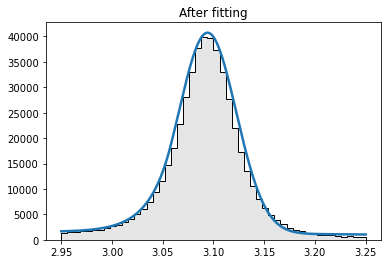

In [6]:
plt.figure()
plt.title("After fitting")

# plot the data
plt.hist(mass_data, color='black', bins=50, histtype="stepfilled", alpha=0.1)
plt.hist(mass_data, color='black', bins=50, histtype='step')

# plot the pdf
x = np.linspace(2.95, 3.25, 1000)
y = model.pdf(x).numpy()

n_bins = 46

plot_scaling = n_sample / n_bins * obs.area()

plt.plot(x, y * plot_scaling, label="CrystalBall", linewidth=2.5)
plt.plot

In [7]:
result.params

{<zfit.Parameter 'yield_model' floating=True value=4.438e+05>: {'value': 443804.01298210747,
  'minuit_minos': ┌──────────┬───────────────────────┐
│          │      yield_model      │
├──────────┼───────────┬───────────┤
│  Error   │  -0.8e3   │   0.8e3   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘},
 <zfit.Parameter 'yield_back' floating=True value=5.858e+04>: {'value': 58584.68884806234,
  'minuit_minos': ┌──────────┬───────────────────────┐
│          │      yield_back       │
├──────────┼───────────┬───────────┤
│  Error   │  -0.5e3   │   0.5e3   │
│  Valid   │   True    │   True    │
│ At Limit │   False   │   False   │
│ Max FCN  │   False   │   False   │
│ New Min  │   False   │   False   │
└──────────┴───────────┴───────────┘},
 <zfit.Parameter 'alpha' floating=True value=1.284>: {'value': 1.2842508041116019,
  'minuit_minos': ┌────────

In [ ]:
size_normal = 800000
data_normal_np = np.random.normal(size=size_normal, scale=2)

In [ ]:
def plot_model(model, data, scale=1, plot_data=True):  # we will use scale later on

    nbins = 100

    lower, upper = data.data_range.limit1d
    x = tf.linspace(lower, upper, num=1000)  # np.linspace also works
    y = model.pdf(x) * size_normal / nbins * data.data_range.area()
    y *= scale
    plt.plot(x, y)
    data_plot = zfit.run(z.unstack_x(data))  # we could also use the `to_pandas` method
    if plot_data:
        plt.hist(data_plot, bins=nbins)

In [ ]:
minimizer = zfit.minimize.Minuit(use_minuit_grad=True)

In [ ]:
# Loss to combine model and data

nll_gauss = zfit.loss.UnbinnedNLL(gauss, datafit)

In [ ]:
# Minimization using Minuit
minimizer = zfit.minimize.Minuit(use_minuit_grad=True)


In [ ]:
minimizer.minimize(nll_gauss)

In [ ]:
plot_model(gauss, datafit, plot_data=True )

In [ ]:
import numpy as np
import zfit
import matplotlib.pyplot as plt

# create space
obs = zfit.Space("x", limits=(-10, 10))

# parameters
mu2 = zfit.Parameter("mu2", 1., -4, 6)
sigma2 = zfit.Parameter("sigma2", 1., 0.1, 10)
lambd = zfit.Parameter("lambda", -0.06, -1, -0.01)
frac = zfit.Parameter("fraction", 0.3, 0, 1)

# model building, pdf creation
gauss = zfit.pdf.Gauss(mu=mu2, sigma=sigma2, obs=obs)
exponential = zfit.pdf.Exponential(lambd, obs=obs)
model = zfit.pdf.SumPDF([gauss, exponential], fracs=frac)

# data
n_sample = 10000

exp_data = exponential.sample(n=n_sample * (1 - frac)).numpy()

gauss_data = gauss.sample(n=n_sample * frac).numpy()

data = model.create_sampler(n_sample, limits=obs)
data.resample()

mu2.set_value(0.5)
sigma2.set_value(1.2)
lambd.set_value(-0.05)
frac.set_value(0.07)

# plot the data
data_np = data[:, 0].numpy()
color = 'black'
n_bins = 50

linewidth = 2.5
plot_scaling = n_sample / n_bins * obs.area()

x = np.linspace(-10, 10, 1000)

# plot the pdf BEFORE fitting
plt.figure()
plt.title("Before fitting")
# plot the data
plt.hist(data_np, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
plt.hist(data_np, color=color, bins=n_bins, histtype="step")
# plot the pdfs
y = model.pdf(x).numpy()
y_gauss = (gauss.pdf(x) * frac).numpy()  # notice the frac!
y_exp = (exponential.pdf(x) * (1 - frac)).numpy()  # notice the frac!

In [ ]:
#plt.plot(x, y * plot_scaling, label="Sum - Model", linewidth=linewidth * 2)
plt.plot(x, y_gauss * plot_scaling, '--', label="Gauss - Signal", linewidth=linewidth)
#plt.plot(x, y_exp * plot_scaling, '--', label="Exponential - Background", linewidth=linewidth)
plt.xlabel("Physical observable")
plt.legend()

In [ ]:
# create NLL
nll = zfit.loss.UnbinnedNLL(model=model, data=data)

# create a minimizer
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)

# do the error calculations, here with minos
param_errors, _ = result.errors()

/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/ipykernel_launcher.py:42: UserWarning: The function <function Space.area at 0x7f8d10e55598> may does not return the actual area/limits but rather the rectangular limits. <zfit Space obs=('x',), axes=None, limits=(array([[-10.]]), array([[10.]]))> can also have functional limits that are arbitrarily defined and lay inside the rect_limits. To test if a value is inside, use `inside` or `filter`.


┌──────────────────────────────────┬──────────────────────────────────────┐
│ FCN = 2.814e+04                  │        Nfcn = 131 (131 total)        │
│ EDM = 7.46e-07 (Goal: 0.001)     │                                      │
├───────────────┬──────────────────┼──────────────────────────────────────┤
│ Valid Minimum │ Valid Parameters │        No Parameters at limit        │
├───────────────┴──────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│   Hesse ok    │  Has Covariance  │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘


/afs/cern.ch/user/m/mabarros/miniconda3/envs/OniaOpenCharmRun2ULenv/lib/python3.7/site-packages/zfit/minimizers/fitresult.py:360: FutureWarning: 'minuit_minos' will be changed as the default errors method to a custom implementationwith the same functionality. If you want to make sure that 'minuit_minos' will be used in the future, add it explicitly as in `errors(method='minuit_minos')`
  "in the future, add it explicitly as in `errors(method='minuit_minos')`", FutureWarning)


(array([234., 238., 240., 231., 199., 216., 204., 212., 202., 184., 187.,
        181., 174., 179., 188., 174., 160., 145., 120., 159., 148., 161.,
        172., 263., 359., 472., 559., 600., 560., 480., 392., 261., 192.,
        138.,  98.,  98.,  93.,  90., 104.,  85.,  92.,  92.,  96.,  97.,
         87.,  87.,  76.,  70.,  70.,  81.]),
 array([-9.99905751e+00, -9.59914814e+00, -9.19923877e+00, -8.79932940e+00,
        -8.39942003e+00, -7.99951065e+00, -7.59960128e+00, -7.19969191e+00,
        -6.79978254e+00, -6.39987317e+00, -5.99996380e+00, -5.60005442e+00,
        -5.20014505e+00, -4.80023568e+00, -4.40032631e+00, -4.00041694e+00,
        -3.60050757e+00, -3.20059819e+00, -2.80068882e+00, -2.40077945e+00,
        -2.00087008e+00, -1.60096071e+00, -1.20105134e+00, -8.01141964e-01,
        -4.01232592e-01, -1.32322027e-03,  3.98586151e-01,  7.98495523e-01,
         1.19840489e+00,  1.59831427e+00,  1.99822364e+00,  2.39813301e+00,
         2.79804238e+00,  3.19795175e+00,  3.59786

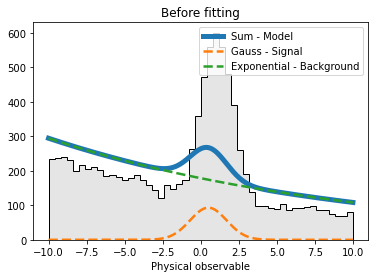

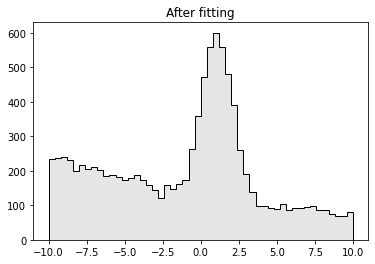

In [3]:
#  Copyright (c) 2020 zfit

import numpy as np
import zfit
import matplotlib.pyplot as plt

# create space
obs = zfit.Space("x", limits=(-10, 10))

# parameters
mu = zfit.Parameter("mu", 1., -4, 6)
sigma = zfit.Parameter("sigma", 1., 0.1, 10)
lambd = zfit.Parameter("lambda", -0.06, -1, -0.01)
frac = zfit.Parameter("fraction", 0.3, 0, 1)

# model building, pdf creation
gauss = zfit.pdf.Gauss(mu=mu, sigma=sigma, obs=obs)
exponential = zfit.pdf.Exponential(lambd, obs=obs)
model = zfit.pdf.SumPDF([gauss, exponential], fracs=frac)

# data
n_sample = 10000

exp_data = exponential.sample(n=n_sample * (1 - frac)).numpy()

gauss_data = gauss.sample(n=n_sample * frac).numpy()

data = model.create_sampler(n_sample, limits=obs)
data.resample()

mu.set_value(0.5)
sigma.set_value(1.2)
lambd.set_value(-0.05)
frac.set_value(0.07)

# plot the data
data_np = data[:, 0].numpy()
color = 'black'
n_bins = 50

linewidth = 2.5
plot_scaling = n_sample / n_bins * obs.area()

x = np.linspace(-10, 10, 1000)

# plot the pdf BEFORE fitting
plt.figure()
plt.title("Before fitting")
# plot the data
plt.hist(data_np, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
plt.hist(data_np, color=color, bins=n_bins, histtype="step")
# plot the pdfs
y = model.pdf(x).numpy()
y_gauss = (gauss.pdf(x) * frac).numpy()  # notice the frac!
y_exp = (exponential.pdf(x) * (1 - frac)).numpy()  # notice the frac!

plt.plot(x, y * plot_scaling, label="Sum - Model", linewidth=linewidth * 2)
plt.plot(x, y_gauss * plot_scaling, '--', label="Gauss - Signal", linewidth=linewidth)
plt.plot(x, y_exp * plot_scaling, '--', label="Exponential - Background", linewidth=linewidth)
plt.xlabel("Physical observable")
plt.legend()

# create NLL
nll = zfit.loss.UnbinnedNLL(model=model, data=data)

# create a minimizer
minimizer = zfit.minimize.Minuit()
result = minimizer.minimize(nll)

# do the error calculations, here with minos
param_errors, _ = result.errors()

plt.figure()
plt.title("After fitting")
# plot the data
plt.hist(data_np, color=color, bins=n_bins, histtype="stepfilled", alpha=0.1)
plt.hist(data_np, color=color, bins=n_bins, histtype="step")



# plt.show()

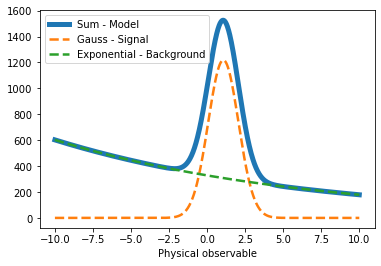

In [5]:
n_bins = 20

linewidth = 2.5
plot_scaling = n_sample / n_bins * obs.area()
y = model.pdf(x).numpy()  # rerun now after the fitting
y_gauss = (gauss.pdf(x) * frac).numpy()
y_exp = (exponential.pdf(x) * (1 - frac)).numpy()

plt.plot(x, y * plot_scaling, label="Sum - Model", linewidth=linewidth * 2)
plt.plot(x, y_gauss * plot_scaling, '--', label="Gauss - Signal", linewidth=linewidth)
plt.plot(x, y_exp * plot_scaling, '--', label="Exponential - Background", linewidth=linewidth)
plt.xlabel("Physical observable")
plt.legend()